<a href="https://colab.research.google.com/github/le-patrice/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implement the standard LeNet CNN architecture model to classify multi category image dataset (MNIST) and check the accuracy

In [18]:
# LeNet
import tensorflow as tf
from tensorflow import keras
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [26]:
(train_x, train_y),(test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x/255.0
test_x = test_x / 255.0
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)

val_x = train_x[:5000]
val_y = train_y[:5000]

In [27]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5,strides=1,activation='tanh',input_shape=train_x[0].shape, padding='same'),\
    keras.layers.AveragePooling2D(pool_size=(2, 2)),\
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'),\
    keras.layers.AveragePooling2D(pool_size=(2, 2)),\
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'),\
    keras.layers.Flatten(),\
    keras.layers.Dense(84, activation='tanh'),\
    keras.layers.Dense(10, activation='softmax')
])

In [28]:
lenet_5_model.compile(optimizer='adam',\
                      loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8779 - loss: 0.3964 - val_accuracy: 0.9722 - val_loss: 0.0910
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9721 - loss: 0.0897 - val_accuracy: 0.9838 - val_loss: 0.0530
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9811 - loss: 0.0573 - val_accuracy: 0.9890 - val_loss: 0.0391
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9866 - loss: 0.0416 - val_accuracy: 0.9908 - val_loss: 0.0288
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9894 - loss: 0.0352 - val_accuracy: 0.9916 - val_loss: 0.0265


In [29]:
test_loss, test_acc = lenet_5_model.evaluate(test_x, test_y)
print('Test loss',test_loss)
print('Test accuracy','test_acc')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9832 - loss: 0.0565
Test loss 0.048736292868852615
Test accuracy test_acc


In [23]:
import matplotlib.pyplot as plt

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
7


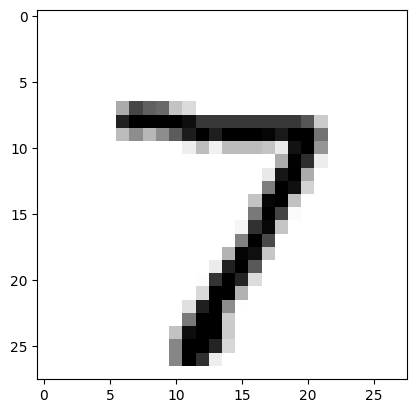

In [30]:
predictions = lenet_5_model.predict(test_x)
print(np.argmax(np.round(predictions[0])))
plt.imshow(test_x[0],cmap=plt.cm.binary)
